In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

# Loading

/data/render_results_only_mist/simulacao135/simulacao135_0095.exr
/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao135/simulacao135_0095.png


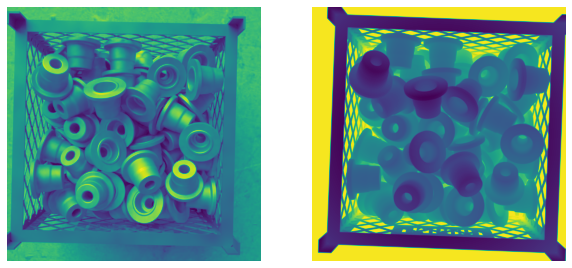

In [8]:
raw_mist_dir = Path('/data/render_results_only_mist')

mists_dirs = list(raw_mist_dir.glob('simulacao*'))

mist_dir = np.random.choice(mists_dirs)
mist_fpath = np.random.choice(list(mist_dir.glob('*.exr')))

raw_img_dir = project_dir/'data/raw/render_results'

img_fpath = raw_img_dir/mist_fpath.parent.name/mist_fpath.name.replace('.exr', '.png')

print(mist_fpath)
print(img_fpath)

img = o3d.io.read_image(str(img_fpath))
img_data = np.asarray(img)[:,:,2]

mist_data = cv2.imread(str(mist_fpath),  cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)[:,:,0]

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)

axs[0].imshow(img_data)
axs[0].set_axis_off()
axs[1].imshow(mist_data)
axs[1].set_axis_off()

fig.show()

# Open3D RGBD

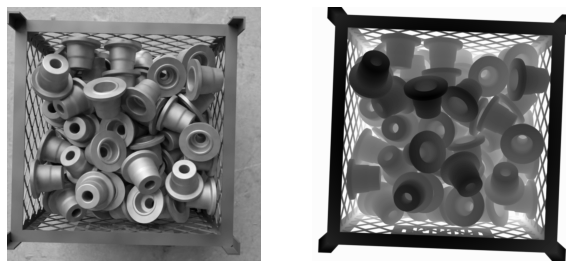

In [28]:
color_img = o3d.geometry.Image((img_data / 255).astype('float32'))
depth_img = o3d.geometry.Image(mist_data.astype('float32'))

rgbd_img = o3d.geometry.RGBDImage.create_from_color_and_depth(color_img, depth_img, depth_scale=1)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)

axs[0].imshow(rgbd_img.color, cmap='gray')
axs[1].imshow(rgbd_img.depth, cmap='gray')

axs[0].set_axis_off()
axs[1].set_axis_off()

fig.show()